# Acoustic Anomaly Detection based on Images with Azure AutoML for Images
## 04. Spectograms creation

<img src='https://github.com/retkowsky/CustomVision_Datasets/blob/master/anomaly.png?raw=true' width = 600>

<div class="alert alert-info"> <b> In this notebook We will generate spectograms for all the files</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 25-Oct-2022 | V3

In [1]:
#pip install basic_image_eda

In [2]:
#!pip install --upgrade pillow

In [3]:
import matplotlib.pyplot as plt
import urllib.request
import librosa, librosa.display, IPython.display as ipd
import numpy as np
import wave
import os
import os.path, time
import seaborn
import glob
import shutil
import sys

from scipy.io import wavfile as wav
from pathlib import Path
from datetime import datetime
from zipfile import ZipFile

%matplotlib inline

In [4]:
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [5]:
import datetime

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2022-10-25 13:05:15


In [6]:
def create_dir(mydir):
    """
    Creating a directory if needed
    """
    path = Path(mydir)
    if path.is_dir():
        print("Directory", mydir, 'exists so we will use it.')

    else:
        os.mkdir(mydir)

## Generating all the spectograms

In [7]:
durationsecs = 10
hoplength = 512
samprate = 44100
nfft = 2048

In [13]:
def spectogram_batch(wavdir, resultdir):
    """
    Spectogram generation
    """
    create_dir(resultdir)

    for root, _, files in os.walk(wavdir):
        print("Directory", root, "has", len(files), "files.")

    from datetime import datetime
    start_time = datetime.now()
    print("Creating the spectograms for all the wav files from", wavdir)
    print("\nRunning...\n")

    wavfiles = [file for file in os.listdir(wavdir) if file.endswith(('wav'))]

    for wavfile in wavfiles:

        plt.figure(figsize=(15, 7))
        wavfile = wavdir + wavfile
        print(wavfile)

        y, sr = librosa.load(wavfile,
                             sr=None,
                             mono=True,
                             offset=0.0,
                             duration=durationsecs)
        plt.ioff()
        fig = plt.figure()

        mel_signal = librosa.feature.melspectrogram(y=y,
                                                    sr=sr,
                                                    hop_length=hoplength,
                                                    n_fft=nfft)
        spectrogram = np.abs(mel_signal)
        power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
        librosa.display.specshow(power_to_db,
                                 sr=sr,
                                 x_axis='time',
                                 y_axis='mel',
                                 cmap='magma',
                                 hop_length=hoplength)

        plt.axis('off')
        outputfilename = wavfile.split('.')
        outputfilename = outputfilename[0].split('/')

        savefilename = resultdir + '/' + str(outputfilename[2]) + '.jpg'
        plt.savefig(savefilename, dpi=300)
        plt.close('all')

    print('\nDone.')
    end_time = datetime.now()
    print("Execution time:", (end_time - start_time))

In [9]:
create_dir("spectograms")

In [10]:
create_dir("spectograms/OK")

In [11]:
create_dir("spectograms/KO")

## Running the spectograms

In [14]:
spectogram_batch("audio_samples/KO/", "spectograms/KO/")

Directory spectograms/KO/ exists so we will use it.
Directory audio_samples/KO/ has 61 files.
Creating the spectograms for all the wav files from audio_samples/KO/

Running...

audio_samples/KO/machine_KO_1.wav
audio_samples/KO/machine_KO_10.wav
audio_samples/KO/machine_KO_11.wav
audio_samples/KO/machine_KO_12.wav
audio_samples/KO/machine_KO_13.wav
audio_samples/KO/machine_KO_14.wav
audio_samples/KO/machine_KO_15.wav
audio_samples/KO/machine_KO_16.wav
audio_samples/KO/machine_KO_17.wav
audio_samples/KO/machine_KO_18.wav
audio_samples/KO/machine_KO_19.wav
audio_samples/KO/machine_KO_2.wav
audio_samples/KO/machine_KO_20.wav
audio_samples/KO/machine_KO_21.wav
audio_samples/KO/machine_KO_22.wav
audio_samples/KO/machine_KO_23.wav
audio_samples/KO/machine_KO_24.wav
audio_samples/KO/machine_KO_25.wav
audio_samples/KO/machine_KO_26.wav
audio_samples/KO/machine_KO_27.wav
audio_samples/KO/machine_KO_28.wav
audio_samples/KO/machine_KO_29.wav
audio_samples/KO/machine_KO_3.wav
audio_samples/KO/mach

In [15]:
spectogram_batch("audio_samples/OK/", "spectograms/OK/")

Directory spectograms/OK/ exists so we will use it.
Directory audio_samples/OK/ has 61 files.
Creating the spectograms for all the wav files from audio_samples/OK/

Running...

audio_samples/OK/machine_OK_1.wav
audio_samples/OK/machine_OK_10.wav
audio_samples/OK/machine_OK_11.wav
audio_samples/OK/machine_OK_12.wav
audio_samples/OK/machine_OK_13.wav
audio_samples/OK/machine_OK_14.wav
audio_samples/OK/machine_OK_15.wav
audio_samples/OK/machine_OK_16.wav
audio_samples/OK/machine_OK_17.wav
audio_samples/OK/machine_OK_18.wav
audio_samples/OK/machine_OK_19.wav
audio_samples/OK/machine_OK_2.wav
audio_samples/OK/machine_OK_20.wav
audio_samples/OK/machine_OK_21.wav
audio_samples/OK/machine_OK_22.wav
audio_samples/OK/machine_OK_23.wav
audio_samples/OK/machine_OK_24.wav
audio_samples/OK/machine_OK_25.wav
audio_samples/OK/machine_OK_26.wav
audio_samples/OK/machine_OK_27.wav
audio_samples/OK/machine_OK_28.wav
audio_samples/OK/machine_OK_29.wav
audio_samples/OK/machine_OK_3.wav
audio_samples/OK/mach

## Checking the number of generated files

In [16]:
for root, _, files in os.walk('spectograms/OK/'):
    print("Directory", root, "has", len(files), "spectogram jpg files.")

Directory spectograms/OK/ has 61 spectogram jpg files.


In [17]:
for root, _, files in os.walk('spectograms/KO/'):
    print("Directory", root, "has", len(files), "spectogram jpg files.")

Directory spectograms/KO/ has 61 spectogram jpg files.


## EDA On the images to check the shape of each spectograms

In [18]:
def image_eda(data_dir, option):
    """
    Images EDA
    """
    from basic_image_eda import BasicImageEDA

    if option == 'basic':
        BasicImageEDA.explore(data_dir)  # Use this for basic Image EDA

    if option == 'advanced':
        extensions = ['jpg']
        threads = 0
        dimension_plot = True
        channel_hist = True
        nonzero = False
        hw_division_factor = 1.0

        BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot,
                              channel_hist, nonzero, hw_division_factor)

In [19]:
image_eda("./spectograms/OK",  "basic")


found 61 images.
Using 8 threads. (max:8)



100%|██████████| 61/61 [00:02<00:00, 29.52it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  61

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1200
max height                               |  1200
mean height                              |  1200.0
median height                            |  1200

min width                                |  1800
max width                                |  1800
mean width                               |  1800.0
median width                             |  1800

mean height/width ratio                  |  0.6666666666666666
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [1200 1800] (h x w, multiples of 8)
recommended input size(by mean)          |  [1200 1792] (h x w, multiples of 16)
recommended input size(by 

In [20]:
image_eda("./spectograms/KO", "basic")


found 61 images.
Using 8 threads. (max:8)



100%|██████████| 61/61 [00:01<00:00, 32.31it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  61

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1200
max height                               |  1200
mean height                              |  1200.0
median height                            |  1200

min width                                |  1800
max width                                |  1800
mean width                               |  1800.0
median width                             |  1800

mean height/width ratio                  |  0.6666666666666666
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [1200 1800] (h x w, multiples of 8)
recommended input size(by mean)          |  [1200 1792] (h x w, multiples of 16)
recommended input size(by 

Text(0, 0.5, 'Number of Spectograms')

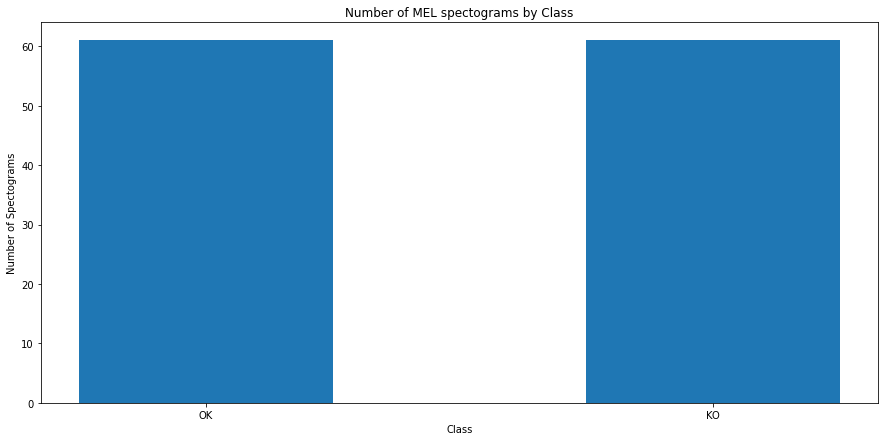

In [21]:
number_classes = {
    'OK': len(os.listdir('spectograms/OK')),
    'KO': len(os.listdir('spectograms/KO'))
}

plt.figure(figsize=(15, 7))
plt.bar(number_classes.keys(), number_classes.values(), width=.5)
plt.title("Number of MEL spectograms by Class")
plt.xlabel('Class')
plt.ylabel('Number of Spectograms')

## Zipping the files

In [23]:
create_dir("archive")

In [24]:
shutil.make_archive("archive/spectograms", 'zip', "spectograms/")

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/standardd13v2/code/Users/seretkow/Sound/MachineSoundAnomaly/archive/spectograms.zip'

In [25]:
!ls archive/spectograms.zip -lh

-rwxrwxrwx 1 root root 52M Oct 25 13:08 archive/spectograms.zip


In [27]:
from IPython.display import FileLink

LINK = FileLink(path='archive/spectograms.zip')
print("Click to download the file:")
LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/standardd13v2/code/Users/seretkow/Sound/MachineSoundAnomaly/archive/spectograms.zip

Now you can use Azure Custom Vision to create an image classification model

> End. You can go to the next notebook

Note: All these Python notebooks were made for demo purposes. They were not designed for production usage. Some feature can be currently in public preview. This preview version is provided without a service-level agreement. Certain features might not be supported or might have constrained capabilities. For more information, see Supplemental Terms of Use for Microsoft Azure Previews. https://azure.microsoft.com/en-us/support/legal/preview-supplemental-terms/